# Setup

In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Import Data

In [2]:
impt_data = pd.read_csv("CLC_train.csv")

In [3]:
labels = impt_data.pop("CO_level")
data = impt_data.drop(["Date", "Time"], axis = 1)

In [4]:
data = data.to_numpy()
labels = labels.to_numpy()

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0, test_size = 0.3)

In [6]:
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
Y_OH_val = enc.transform(np.expand_dims(Y_val, 1)).toarray()

In [7]:
X_train, Y_OH_train, X_val, Y_OH_val = map(torch.tensor, (X_train, Y_OH_train, X_val, Y_OH_val))

In [24]:
X_train, X_val = X_train.float(), X_val.float()

# FF Network

In [8]:
class FF_Network(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
            nn.Linear(13, 64),
            nn.ReLU(),
            nn.Linear(64, 5),
            nn.Sigmoid(),
            nn.Softmax()
        )
           
    def forward(self, X):
        return(self.net(X))

In [9]:
lr = 0.02
epochs = 2000
ff_n = FF_Network()
loss_fn = nn.functional.cross_entropy
optm = optim.SGD(ff_n.parameters(), lr = lr)

In [10]:
def accuracy(Y_hat, Y):
    return(accuracy_score(np.argmax(Y_hat.detach().numpy(), 1), np.argmax(Y, 1)))

In [11]:
def train(X, Y, model, loss_fn, optm, lr):
    loss_b = []
    acc_b = []
    for i in tqdm_notebook(range(epochs)):
        Y_hat = model.forward(X)
        loss = loss_fn(Y_hat, np.argmax(Y, 1))
        acc = accuracy(Y_hat, Y)
        loss_b.append(loss.item())
        acc_b.append(acc)
        loss.backward()
        optm.step()
        optm.zero_grad()
    return(loss_b, acc_b, acc)

In [16]:
loss_b, acc_b, acc_score = train(X_train, Y_OH_train, ff_n, loss_fn, optm, lr = 0.1)

C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


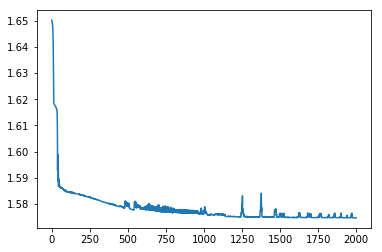

In [17]:
plt.plot(loss_b)

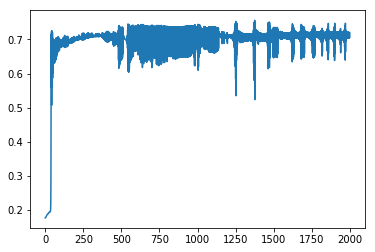

In [18]:
plt.plot(acc_b)

In [19]:
acc_score

0.7201756060316854

In [25]:
accuracy(ff_n.forward(X_val), Y_OH_val)

C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0.7065894924309885

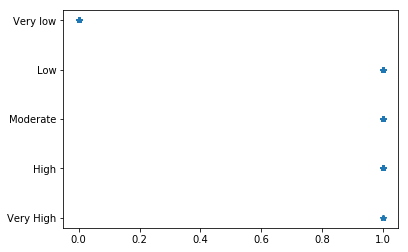

In [50]:
plt.plot(impt_data['CO_GT'] > -200, labels, "*")

In [29]:
impt_data.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH'],
      dtype='object')

In [45]:
impt_data['CO_GT']

0        11.9
1        11.5
2        10.2
3        10.2
4        10.1
        ...  
7480   -200.0
7481   -200.0
7482   -200.0
7483   -200.0
7484   -200.0
Name: CO_GT, Length: 7485, dtype: float64

In [43]:
data

array([[ 1.1900e+01,  2.0080e+03, -2.0000e+02, ...,  1.2400e+01,
         7.4700e+01,  1.0741e+00],
       [ 1.1500e+01,  1.9180e+03, -2.0000e+02, ...,  1.1500e+01,
         7.6200e+01,  1.0324e+00],
       [ 1.0200e+01,  1.8020e+03, -2.0000e+02, ...,  1.3700e+01,
         5.2800e+01,  8.2440e-01],
       ...,
       [-2.0000e+02,  9.1200e+02, -2.0000e+02, ...,  1.5800e+01,
         7.5500e+01,  1.3436e+00],
       [-2.0000e+02,  8.1700e+02, -2.0000e+02, ...,  1.6000e+01,
         6.9500e+01,  1.2549e+00],
       [-2.0000e+02,  7.8600e+02, -2.0000e+02, ...,  1.5000e+01,
         7.1000e+01,  1.2032e+00]])